In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/jr0th/github/segmentation/code/')

import skimage.io
import skimage.morphology
import skimage.segmentation

import sklearn.metrics

import os.path
import os

import numpy as np

import time

debug = True

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [2]:
gt_data_dir = '/home/jr0th/github/segmentation/experiments/GT_segmentations/'
mo_data_dir = '/home/jr0th/github/segmentation/experiments/DL_on_CP/segm_DL_on_CP/'

mat_dir = '/home/jr0th/github/segmentation/experiments/DL_on_CP/IoU/'

path_files_test = '/home/jr0th/github/segmentation/data/BBBC022/test.txt'

err_img_out_dir = '/home/jr0th/github/segmentation/experiments/DL_on_CP/error_img/'

In [3]:
with open(path_files_test) as f:
    test_files = f.read().splitlines()

In [4]:
def visualize(mat, seg_gt, seg_model):

    # get number of nuclei
    nb_nuc_gt = mat.shape[0]
    nb_nuc_model = mat.shape[1]
    
    if debug:
        print('# nuclei ground truth', nb_nuc_gt)
        print('# nuclei model', nb_nuc_model)
    
    # only allow assignments if IoU is at least 0.5
    detection_map = (mat > 0.5)
    nb_matches = np.sum(detection_map)
    detection_map_gt = np.sum(detection_map, 1)
    detection_map_model = np.sum(detection_map, 0)
    
    # mask with matches
    detection_rate = mat * detection_map
    
    nb_overdetection = nb_nuc_model - nb_matches
    nb_underdetection = nb_nuc_gt - nb_matches
    
    if debug:
        print('# matches', nb_matches)
        print('# overdetections', nb_overdetection)
        print('# underdetections', nb_underdetection)
        
    mean_IoU = np.mean(np.sum(detection_rate, axis = 1))
    
    if debug:
        print('# mean IoU', mean_IoU)
    
    # plot masked matrix
    plt.figure(figsize=(10,10))
    plt.matshow(detection_rate)
    plt.show()
    
    # get indices of mislabeled cells
    error_underdetected = np.nonzero(detection_map_gt == 0)[0] + 1
    print(error_underdetected)
    error_overdetected = np.nonzero(detection_map_model == 0)[0] + 1

    # get empty buffer image
    error_img = np.zeros((seg_model.shape[0], seg_model.shape[1], 3), dtype = np.ubyte)

    brownish = [172, 128, 0]
    blueish = [31, 190, 214]
    for error in error_underdetected:
        # brownish: underdetected
        error_img[seg_gt == error, :] = brownish
    for error in error_overdetected:
        # blueish: overdetected
        error_img[seg_model == error, :] = error_img[seg_model == error, :] + blueish
        
    # pixels where under- and overdetection occured appear in pink
    
    return error_img

    

IXMtest_P21_s4_w19B7DC88B-10BB-4B51-9A10-9E30285688C1
# nuclei ground truth 51
# nuclei model 50
# matches 50
# overdetections 0
# underdetections 1
# mean IoU 0.920169


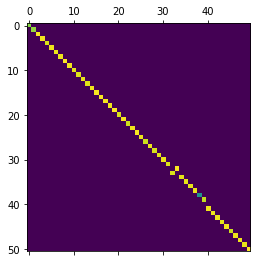

[41]


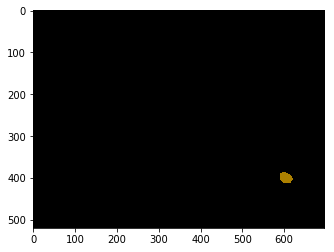

IXMtest_P19_s6_w10EBAD15B-2822-48B9-B9C8-4DF5D80AB940
# nuclei ground truth 84
# nuclei model 78
# matches 77
# overdetections 1
# underdetections 7
# mean IoU 0.849476


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_CP/error_img/IXMtest_P21_s4_w19B7DC88B-10BB-4B51-9A10-9E30285688C1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


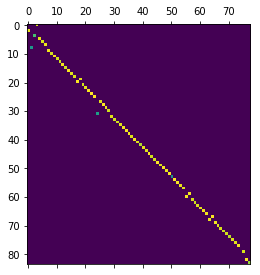

[ 2  4 27 59 79 81 82]


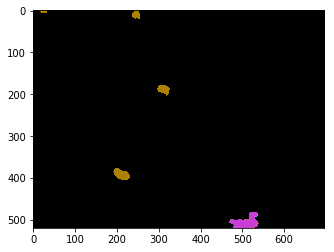

IXMtest_P15_s8_w1D26A5BC7-CF59-4027-B785-85AD33773609
# nuclei ground truth 77
# nuclei model 73
# matches 72
# overdetections 1
# underdetections 5
# mean IoU 0.844966


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_CP/error_img/IXMtest_P19_s6_w10EBAD15B-2822-48B9-B9C8-4DF5D80AB940.png is a low contrast image
  warn('%s is a low contrast image' % fname)


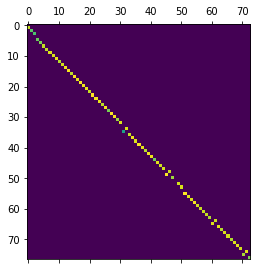

[ 1  5 34 52 55]


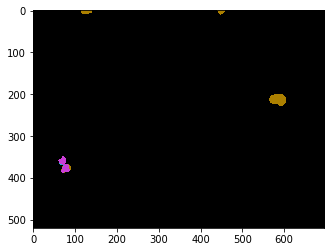

IXMtest_P07_s8_w144364F25-950A-472C-A529-1A9AD0433B6C
# nuclei ground truth 97
# nuclei model 78
# matches 69
# overdetections 9
# underdetections 28
# mean IoU 0.636702


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_CP/error_img/IXMtest_P15_s8_w1D26A5BC7-CF59-4027-B785-85AD33773609.png is a low contrast image
  warn('%s is a low contrast image' % fname)


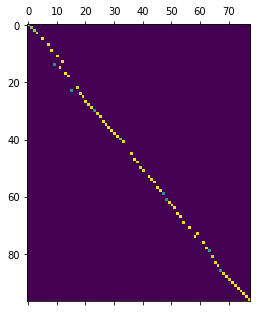

[ 5  7  9 11 13 17 20 21 22 27 34 43 44 45 47 50 53 57 61 66 69 71 73 76 78
 81 83 86]


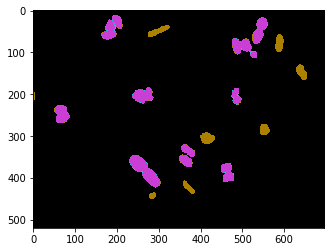

IXMtest_P07_s8_w19D682C29-5685-4A33-8CAA-F0797DD7F021
# nuclei ground truth 44
# nuclei model 43
# matches 43
# overdetections 0
# underdetections 1
# mean IoU 0.91489


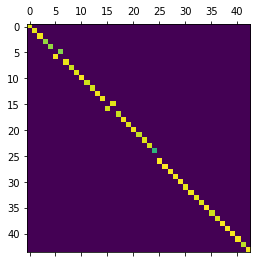

[26]


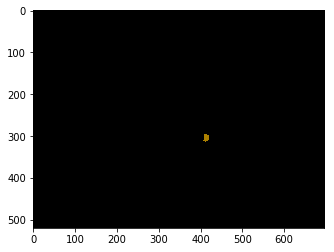

IXMtest_O04_s2_w19A18B0D8-8E8B-4572-A5C0-5C678F3AD54C
# nuclei ground truth 87
# nuclei model 82
# matches 79
# overdetections 3
# underdetections 8
# mean IoU 0.857496


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_CP/error_img/IXMtest_P07_s8_w19D682C29-5685-4A33-8CAA-F0797DD7F021.png is a low contrast image
  warn('%s is a low contrast image' % fname)


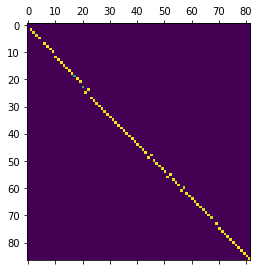

[ 1  2  7 12 23 27 73 75]


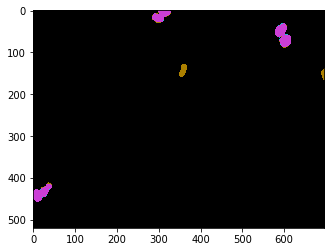

IXMtest_O02_s4_w1814603DA-DD56-44EF-98C5-AFF3B636F986
# nuclei ground truth 69
# nuclei model 63
# matches 61
# overdetections 2
# underdetections 8
# mean IoU 0.831949


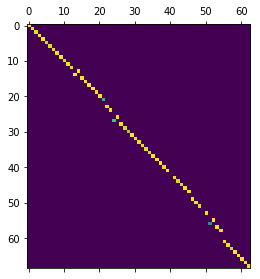

[23 26 43 49 53 55 60 61]


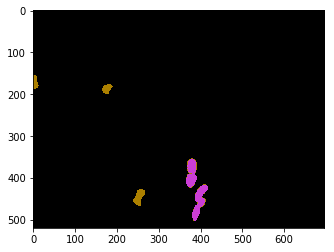

IXMtest_O01_s6_w11A23978B-BAAD-4287-B1F6-FFBCF45C5E2F
# nuclei ground truth 74
# nuclei model 65
# matches 62
# overdetections 3
# underdetections 12
# mean IoU 0.756613


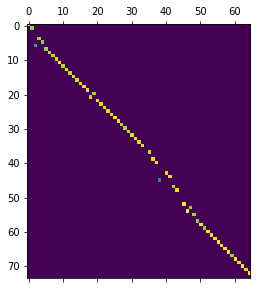

[ 3  4 37 39 42 43 47 50 51 52 57 74]


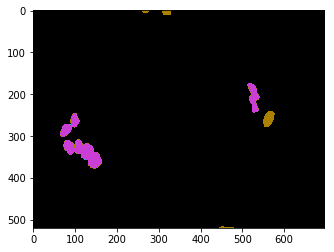

IXMtest_N21_s1_w14F264B20-62D6-47EC-9BCD-B9416AB302D9
# nuclei ground truth 25
# nuclei model 23
# matches 21
# overdetections 2
# underdetections 4
# mean IoU 0.745162


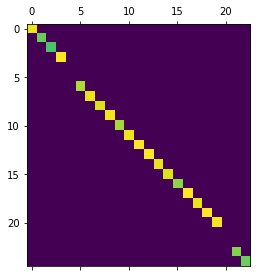

[ 5  6 22 23]


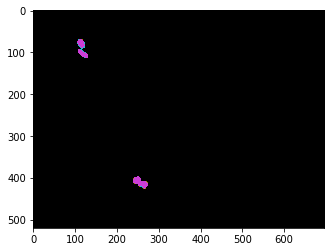

IXMtest_N12_s9_w1C98EC3CC-2F8E-4761-A21A-EBF14469AD40
# nuclei ground truth 138
# nuclei model 122
# matches 114
# overdetections 8
# underdetections 24
# mean IoU 0.751245


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_CP/error_img/IXMtest_N21_s1_w14F264B20-62D6-47EC-9BCD-B9416AB302D9.png is a low contrast image
  warn('%s is a low contrast image' % fname)


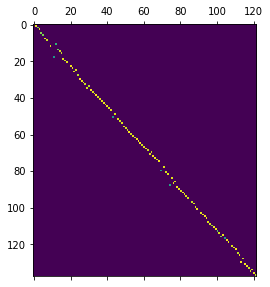

[  5   8  11  14  18  23  28  30  49  51  56  77  78  80  84  86  97 100
 103 108 121 125 128 130]


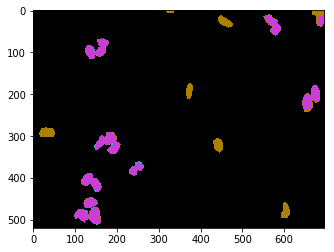

IXMtest_N11_s4_w142A84EA3-47C3-4B49-B6CA-BBC6685BBE1E
# nuclei ground truth 84
# nuclei model 72
# matches 66
# overdetections 6
# underdetections 18
# mean IoU 0.719645


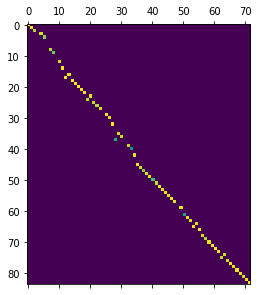

[ 6  7  8 11 12 14 16 29 32 34 35 39 42 44 45 59 61 68]


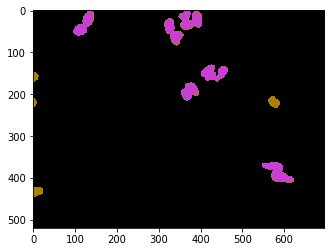

IXMtest_N08_s2_w159DEEDD5-2882-4F9E-9048-F5BD2B918651
# nuclei ground truth 113
# nuclei model 102
# matches 96
# overdetections 6
# underdetections 17
# mean IoU 0.789704


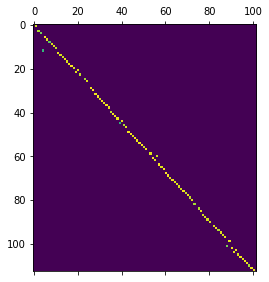

[  3   6  25  28  29  32  40  49  59  64  68  82  84  87  92  99 101]


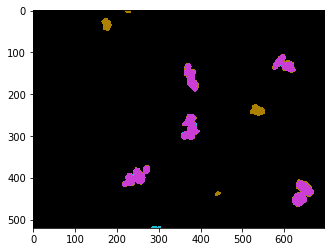

IXMtest_N07_s5_w1D30ED7AB-503E-479D-B5BC-B66472568DE2
# nuclei ground truth 142
# nuclei model 123
# matches 115
# overdetections 8
# underdetections 27
# mean IoU 0.734145


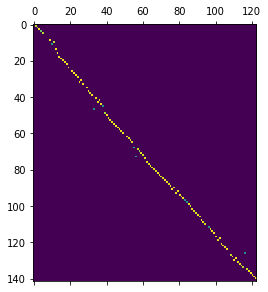

[  7   8   9  13  14  16  18  24  26  31  35  37  41  47  49  52  62  67
  68  76 102 108 112 117 121 126 142]


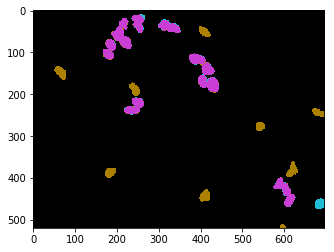

IXMtest_M12_s7_w193E9BA0F-274A-4EE8-A0F0-6A58471A333A
# nuclei ground truth 184
# nuclei model 135
# matches 119
# overdetections 16
# underdetections 65
# mean IoU 0.574168


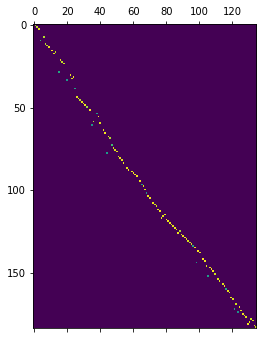

[  1   5   6   7   8  10  12  16  20  21  22  26  27  28  29  31  36  37
  38  39  41  42  43  44  52  54  56  58  59  63  64  66  68  71  72  73
  75  80  84  86  87  94  95  97 100 102 104 107 108 112 115 137 140 141
 142 146 151 154 157 160 164 165 168 169 171]


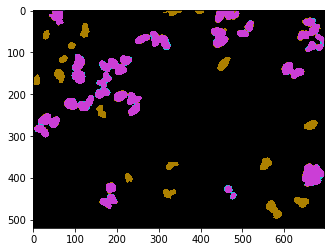

IXMtest_L06_s5_w1610AE208-D6E8-4DC4-AC19-D26284AA8556
# nuclei ground truth 179
# nuclei model 140
# matches 132
# overdetections 8
# underdetections 47
# mean IoU 0.640275


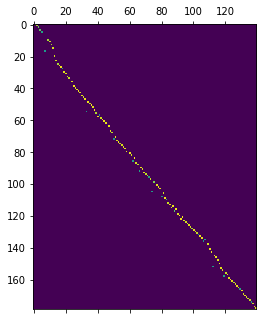

[  4   7   8   9  10  13  15  17  19  20  22  23  25  30  33  36  38  39
  45  49  54  64  66  67  70  71  80  84  86  90  99 101 105 108 112 119
 138 140 141 143 145 148 150 152 156 169 177]


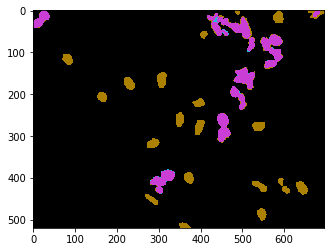

IXMtest_K17_s5_w1BB3AD9D7-3A85-458C-AB1C-07A816C2C203
# nuclei ground truth 141
# nuclei model 126
# matches 120
# overdetections 6
# underdetections 21
# mean IoU 0.758693


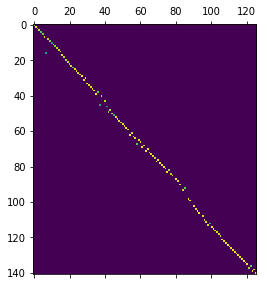

[  7  20  33  42  43  45  48  61  87  90  92  95  96  97  98 101 102 104
 108 110 121]


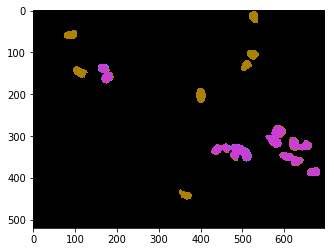

IXMtest_K05_s9_w1647AEF60-D7B0-4D83-AFA5-2B05E968468F
# nuclei ground truth 132
# nuclei model 108
# matches 103
# overdetections 5
# underdetections 29
# mean IoU 0.700016


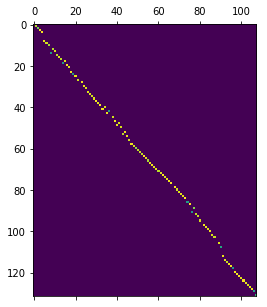

[  6   7   8  12  23  27  30  33  45  47  52  56  58  79  86  89  91  95
  97 102 105 106 108 110 111 112 114 120 131]


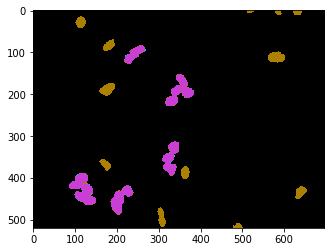

IXMtest_K03_s5_w1DC4CE558-042C-482E-8CAE-FCCB57AA9A55
# nuclei ground truth 128
# nuclei model 107
# matches 100
# overdetections 7
# underdetections 28
# mean IoU 0.722475


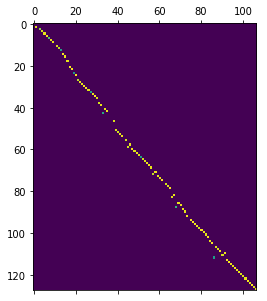

[  2  11  15  18  20  21  24  27  38  41  45  46  47  49  50  51  56  58
  71  77  81  82  85  86  92  94 104 107]


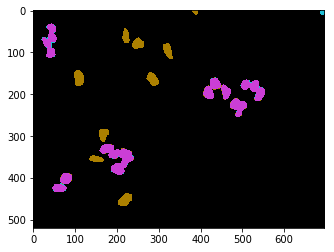

IXMtest_K01_s5_w1A3DE001A-72D6-4321-8B25-4300AB0207AC
# nuclei ground truth 105
# nuclei model 85
# matches 81
# overdetections 4
# underdetections 24
# mean IoU 0.708103


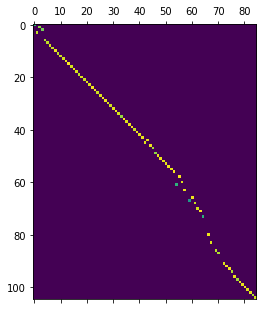

[ 5  6 49 58 60 63 65 66 70 73 75 76 77 78 79 80 82 83 85 86 89 90 91 96]


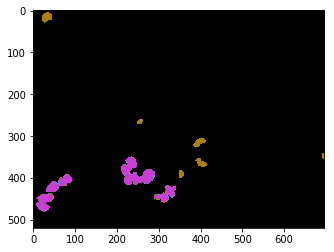

IXMtest_K01_s3_w1054711D8-52CF-4672-B3A0-EC9EC2E681C4
# nuclei ground truth 95
# nuclei model 85
# matches 82
# overdetections 3
# underdetections 13
# mean IoU 0.792106


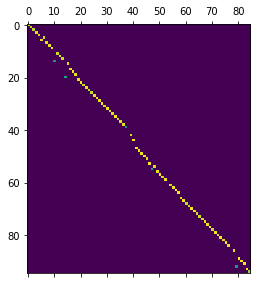

[11 17 41 42 44 46 47 53 61 66 86 88 89]


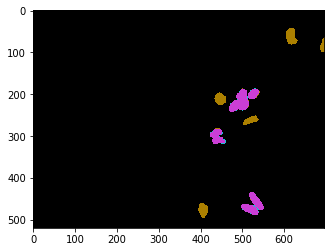

IXMtest_J17_s1_w19E7BCD2F-6D7E-4B39-9154-F93E4D539183
# nuclei ground truth 76
# nuclei model 71
# matches 70
# overdetections 1
# underdetections 6
# mean IoU 0.807829


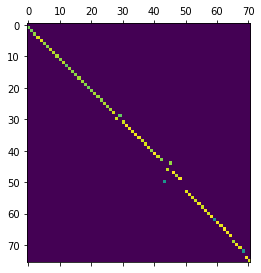

[ 1 46 52 53 69 74]


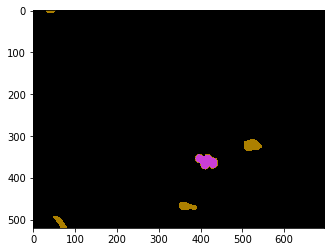

IXMtest_J16_s8_w1AD7BC3EB-6A29-4A53-AA59-E39653839B0D
# nuclei ground truth 136
# nuclei model 112
# matches 104
# overdetections 8
# underdetections 32
# mean IoU 0.695366


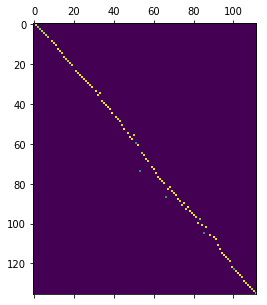

[  9  13  17  23  24  34  38  39  45  47  51  53  55  60  63  64  65  68
  71  72  77  82 100 104 105 110 111 113 115 121 122 129]


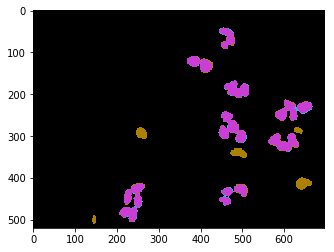

IXMtest_I23_s5_w1E3053D6B-8CEF-48E3-A6A5-2F0D7C1AA177
# nuclei ground truth 34
# nuclei model 30
# matches 28
# overdetections 2
# underdetections 6
# mean IoU 0.760575


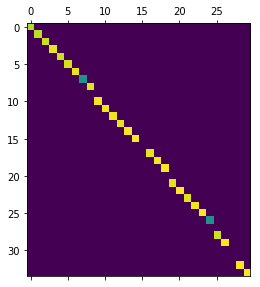

[10 17 21 28 31 32]


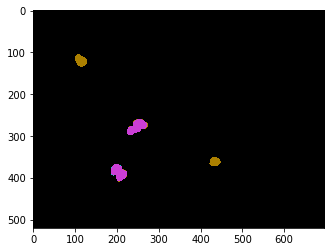

IXMtest_I17_s7_w1BB3D534E-DF08-4F21-BAC6-6B105BB40AF9
# nuclei ground truth 124
# nuclei model 100
# matches 91
# overdetections 9
# underdetections 33
# mean IoU 0.643836


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_CP/error_img/IXMtest_I23_s5_w1E3053D6B-8CEF-48E3-A6A5-2F0D7C1AA177.png is a low contrast image
  warn('%s is a low contrast image' % fname)


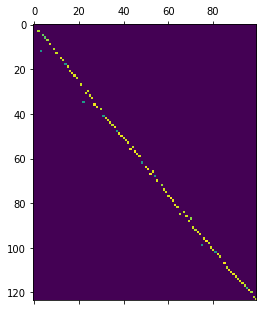

[  2   3   5   9  11  15  18  21  26  27  29  30  35  40  41  48  55  61
  62  64  70  72  74  77  81  84  90  91  96 106 107 109 122]


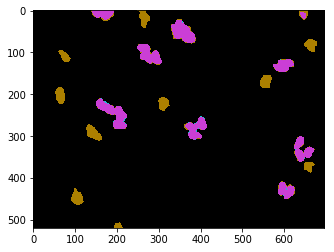

IXMtest_I17_s6_w1EB7CA00F-DF95-466C-BF8C-6304B6A4974E
# nuclei ground truth 138
# nuclei model 115
# matches 108
# overdetections 7
# underdetections 30
# mean IoU 0.706222


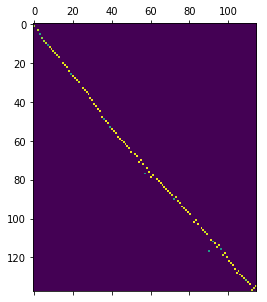

[  1   3   5   7   9  19  20  24  26  32  33  38  41  44  47  48  53  58
  66  70  74  76  94 100 101 105 110 111 122 126]


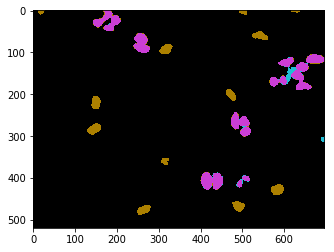

IXMtest_I12_s1_w18A06F07F-CD8F-4056-B041-3967BE48AD78
# nuclei ground truth 197
# nuclei model 133
# matches 108
# overdetections 25
# underdetections 89
# mean IoU 0.495273


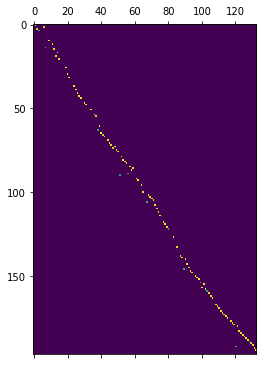

[  6   7   8   9  10  12  14  17  19  21  23  24  25  26  28  29  30  32
  34  35  36  37  39  41  43  46  47  50  51  53  54  57  58  59  60  61
  63  65  69  71  78  79  81  85  89  92  95  96  98  99 100 102 108 110
 112 114 116 117 118 121 124 125 126 127 129 130 131 132 133 135 136 137
 138 142 143 145 150 154 157 162 165 166 167 171 177 182 183 196 197]


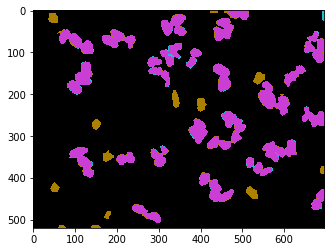

IXMtest_I03_s4_w1C724E24D-7AD5-4166-A810-DC75A825495D
# nuclei ground truth 126
# nuclei model 106
# matches 99
# overdetections 7
# underdetections 27
# mean IoU 0.70055


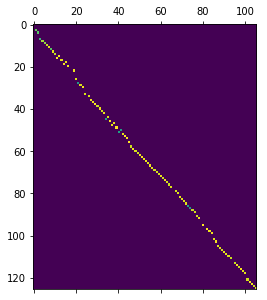

[  2   3   6   7  22  24  25  26  28  32  33  36  44  56  58  79  82  91
  94  95  97 101 102 105 113 120 121]


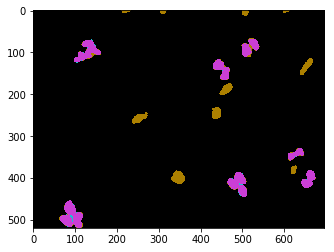

IXMtest_G06_s7_w19444140C-EF22-42DE-863A-514D836BE850
# nuclei ground truth 117
# nuclei model 102
# matches 96
# overdetections 6
# underdetections 21
# mean IoU 0.746676


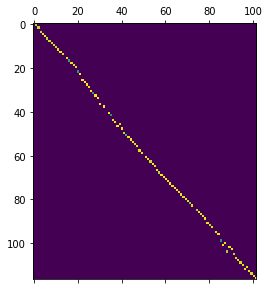

[  4  16  22  25  26  31  36  37  40  41  44  50  58  61  67  85  91  95
  98  99 107]


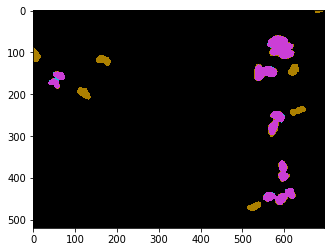

IXMtest_G01_s2_w1FBE52723-8BDF-4346-89BB-216A4A69ED1C
# nuclei ground truth 79
# nuclei model 73
# matches 72
# overdetections 1
# underdetections 7
# mean IoU 0.829118


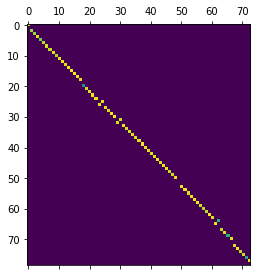

[ 2 20 52 53 67 72 79]


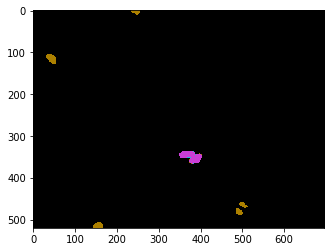

IXMtest_F14_s7_w1E67F2A8A-EEC1-4F01-A1E2-0ECFC639637F
# nuclei ground truth 112
# nuclei model 96
# matches 91
# overdetections 5
# underdetections 21
# mean IoU 0.738546


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_CP/error_img/IXMtest_G01_s2_w1FBE52723-8BDF-4346-89BB-216A4A69ED1C.png is a low contrast image
  warn('%s is a low contrast image' % fname)


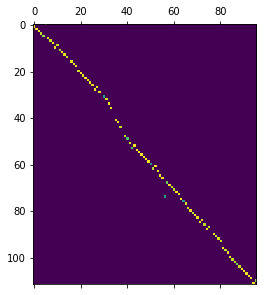

[ 16  20  31  34  36  38  39  40  41  44  46  47  48  51  65  68  79  90
  95  96 100]


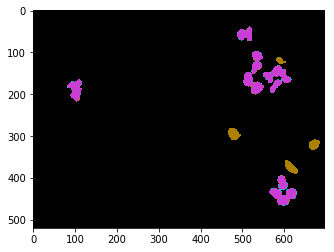

IXMtest_F12_s8_w1DBD80811-5297-4415-ACD1-EC9286BE76A4
# nuclei ground truth 7
# nuclei model 5
# matches 4
# overdetections 1
# underdetections 3
# mean IoU 0.493576


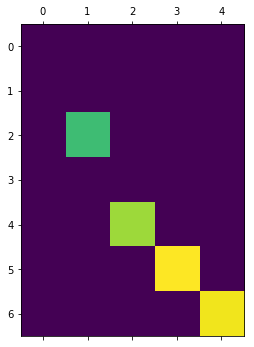

[1 2 4]


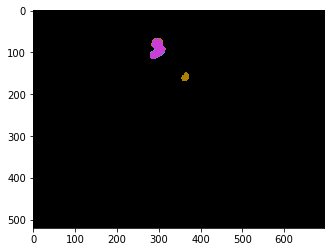

IXMtest_F08_s7_w117D78658-1BA7-495D-9EAA-E4FA155861AC
# nuclei ground truth 58
# nuclei model 49
# matches 45
# overdetections 4
# underdetections 13
# mean IoU 0.711476


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_CP/error_img/IXMtest_F12_s8_w1DBD80811-5297-4415-ACD1-EC9286BE76A4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


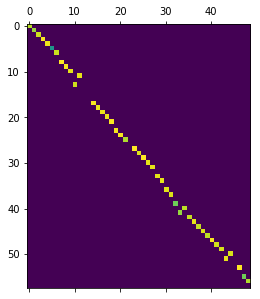

[ 8 13 15 16 17 23 27 33 36 39 53 55 58]


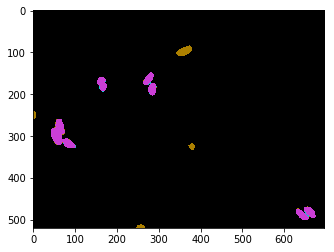

IXMtest_F04_s5_w1D94DA1A2-873C-44B3-80EB-36DC2A97E9A3
# nuclei ground truth 101
# nuclei model 94
# matches 93
# overdetections 1
# underdetections 8
# mean IoU 0.848818


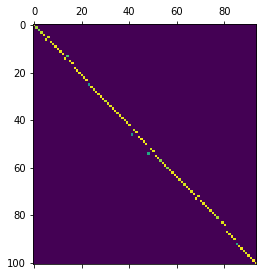

[18 25 44 52 83 86 87 92]


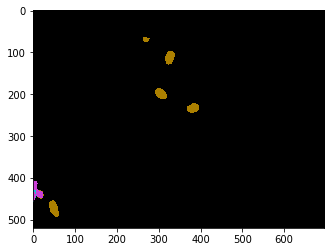

IXMtest_F03_s5_w1FE22EC7D-720A-4848-888A-6AFE1E1C85B0
# nuclei ground truth 131
# nuclei model 110
# matches 105
# overdetections 5
# underdetections 26
# mean IoU 0.736499


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_CP/error_img/IXMtest_F04_s5_w1D94DA1A2-873C-44B3-80EB-36DC2A97E9A3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


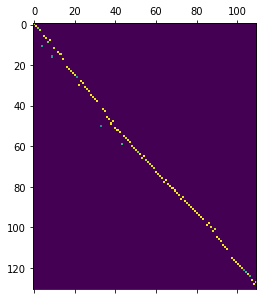

[  5   6  11  14  19  20  21  28  35  40  41  42  45  46  55  73  98 104
 105 109 113 114 115 126 130 131]


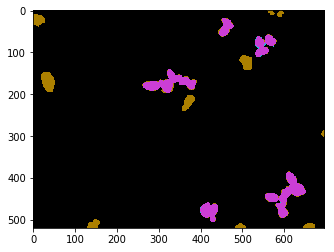

IXMtest_E07_s1_w1641C6847-142B-463F-8B08-5B3296615572
# nuclei ground truth 152
# nuclei model 117
# matches 103
# overdetections 14
# underdetections 49
# mean IoU 0.619054


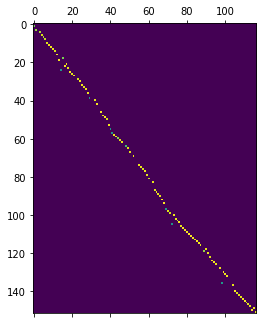

[  1   3   6  10  16  18  21  29  32  36  38  39  42  44  45  46  48  52
  53  55  57  64  67  69  71  72  73  74  79  81  83  85  86  87  92  94
  96  97 102 118 122 124 128 130 134 135 136 139 140]


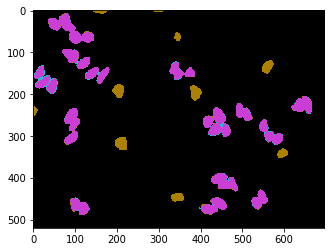

IXMtest_D20_s3_w19D371AF3-0189-48A3-AF3B-D108DE6A017F
# nuclei ground truth 160
# nuclei model 120
# matches 101
# overdetections 19
# underdetections 59
# mean IoU 0.569748


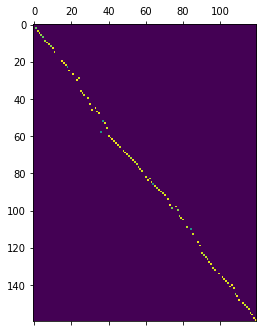

[  1   2   4   9  15  17  18  19  20  25  27  29  32  33  34  35  36  40
  42  43  45  50  51  52  55  56  58  60  68  77  81  82  94  96  97 102
 103 107 108 109 112 113 115 116 117 119 121 122 123 128 131 134 136 144
 145 148 150 155 158]


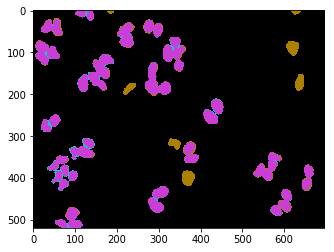

IXMtest_D10_s2_w1BB72A093-72AB-476C-9513-2FF43BFB2134
# nuclei ground truth 134
# nuclei model 110
# matches 102
# overdetections 8
# underdetections 32
# mean IoU 0.682545


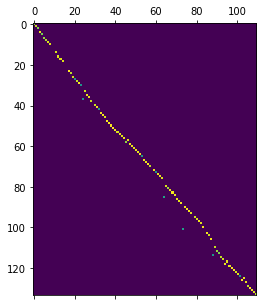

[  4   7  12  13  14  16  20  21  22  23  26  32  33  35  40  44  48  67
  72  78  79  80  90  95 100 103 106 108 109 110 112 129]


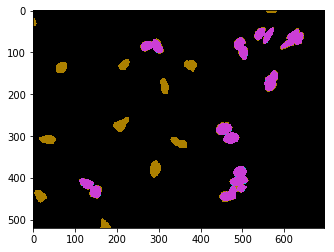

IXMtest_D08_s7_w1F476A544-A07C-4E9B-A6CB-BAEF4CD6F64E
# nuclei ground truth 35
# nuclei model 31
# matches 29
# overdetections 2
# underdetections 6
# mean IoU 0.756479


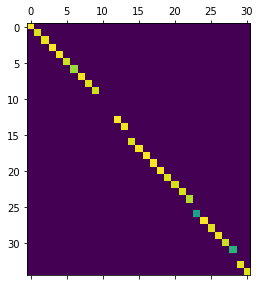

[11 12 13 16 26 33]


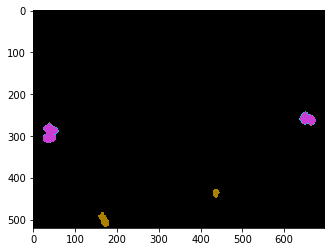

IXMtest_D06_s8_w1BE84C8EF-4CD0-4B56-8267-4E662F57AC25
# nuclei ground truth 151
# nuclei model 126
# matches 113
# overdetections 13
# underdetections 38
# mean IoU 0.680021


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_CP/error_img/IXMtest_D08_s7_w1F476A544-A07C-4E9B-A6CB-BAEF4CD6F64E.png is a low contrast image
  warn('%s is a low contrast image' % fname)


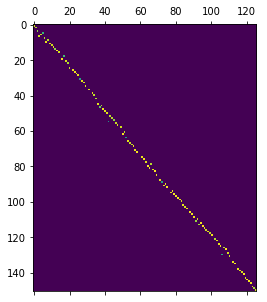

[  1   4  18  20  24  25  31  35  37  39  42  44  45  52  60  61  64  66
  71  74  75  78  85  87  88  94 102 106 109 121 124 129 133 134 137 138
 143 148]


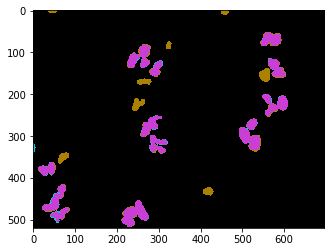

IXMtest_D01_s1_w181AE787C-B5EE-4150-A90E-2FE43165C32E
# nuclei ground truth 95
# nuclei model 88
# matches 86
# overdetections 2
# underdetections 9
# mean IoU 0.810557


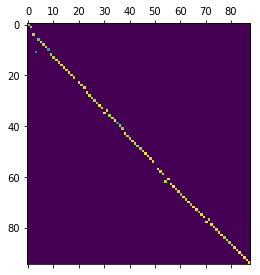

[ 3  4  6 23 27 43 56 57 61]


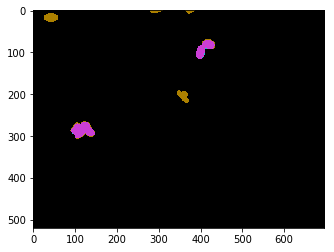

IXMtest_C23_s2_w10533E965-3DC3-4556-9C26-EA8DD4F8DE61
# nuclei ground truth 109
# nuclei model 96
# matches 91
# overdetections 5
# underdetections 18
# mean IoU 0.768328


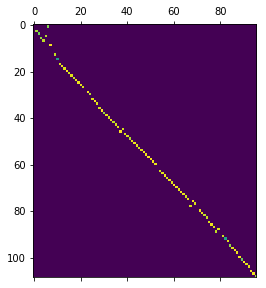

[  3   9  11  12  13  15  17  29  32  36  62  63  80  85  91  95 100 106]


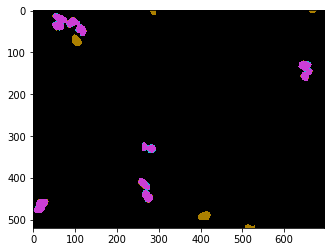

IXMtest_C14_s8_w1612E3D43-FA7E-4FFB-BE53-F34A3A0CAFCD
# nuclei ground truth 124
# nuclei model 106
# matches 100
# overdetections 6
# underdetections 24
# mean IoU 0.738138


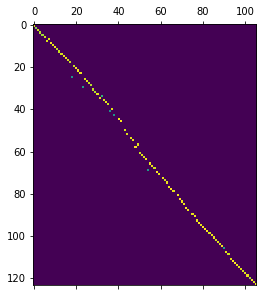

[  1  20  25  40  43  45  48  49  50  52  54  57  60  61  66  73  77  81
  83  87  90  93 108 111]


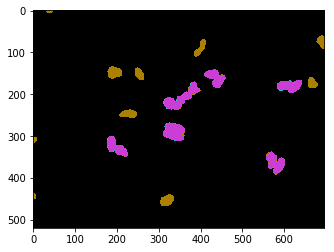

IXMtest_C07_s5_w12C9F2926-A017-4962-8660-72C9C20C86E4
# nuclei ground truth 145
# nuclei model 118
# matches 109
# overdetections 9
# underdetections 36
# mean IoU 0.64226


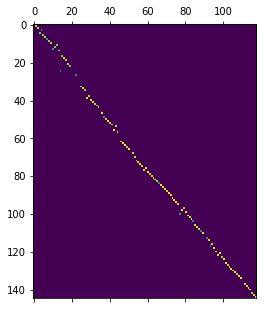

[  5  16  17  21  24  25  27  29  30  31  32  33  37  38  46  47  49  56
  59  60  61  62  68  70  72  92  97 106 112 113 116 120 126 136 137 142]


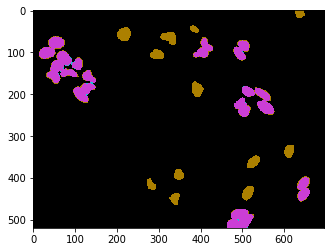

IXMtest_B05_s5_w10296BEF4-0F48-4EC8-BC24-6C604871398B
# nuclei ground truth 108
# nuclei model 98
# matches 94
# overdetections 4
# underdetections 14
# mean IoU 0.814743


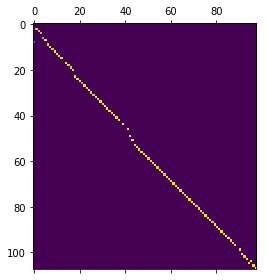

[  1   2   6  17  22  23  44  46  48  49  51  53  99 101]


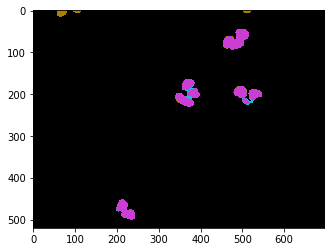

IXMtest_B04_s2_w17C6C7F8D-98F7-422B-92CD-EA61EE813325
# nuclei ground truth 109
# nuclei model 101
# matches 97
# overdetections 4
# underdetections 12
# mean IoU 0.79811


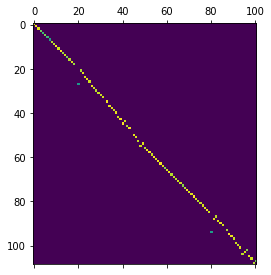

[20 21 24 35 37 42 49 50 53 87 93 99]


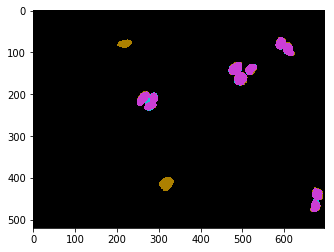

IXMtest_B02_s9_w124B5080D-EBE1-47D2-B147-C0F342039EDF
# nuclei ground truth 61
# nuclei model 58
# matches 56
# overdetections 2
# underdetections 5
# mean IoU 0.877483


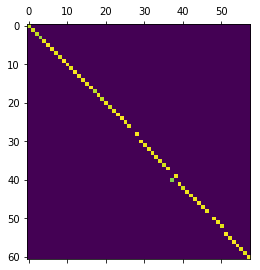

[28 30 39 50 54]


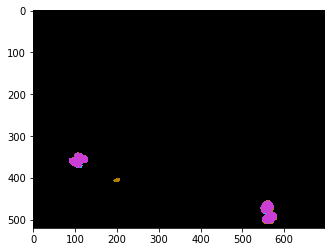

IXMtest_A22_s8_w1E2AFE190-831D-4D9C-961E-3AA2ECB3599D
# nuclei ground truth 88
# nuclei model 82
# matches 79
# overdetections 3
# underdetections 9
# mean IoU 0.827922


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_CP/error_img/IXMtest_B02_s9_w124B5080D-EBE1-47D2-B147-C0F342039EDF.png is a low contrast image
  warn('%s is a low contrast image' % fname)


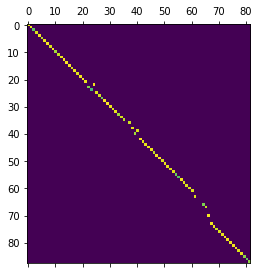

[38 42 63 65 66 69 70 72 73]


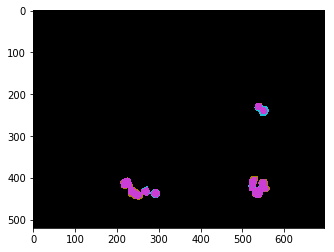

IXMtest_A16_s2_w15AF20A10-82AE-48FA-AC50-7AE8AC3AA544
# nuclei ground truth 86
# nuclei model 84
# matches 84
# overdetections 0
# underdetections 2
# mean IoU 0.91122


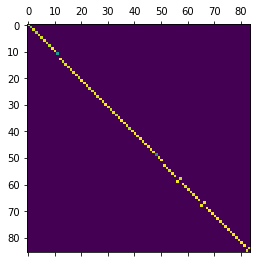

[13 53]


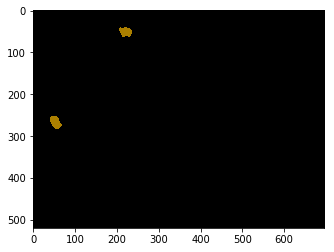

IXMtest_A12_s7_w1EAEEA614-51ED-43B3-A4FF-088730911E4C
# nuclei ground truth 19
# nuclei model 16
# matches 16
# overdetections 0
# underdetections 3
# mean IoU 0.733828


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_CP/error_img/IXMtest_A16_s2_w15AF20A10-82AE-48FA-AC50-7AE8AC3AA544.png is a low contrast image
  warn('%s is a low contrast image' % fname)


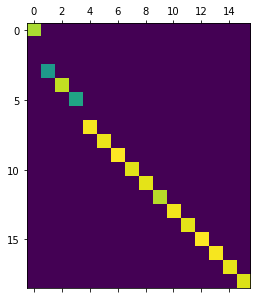

[2 3 7]


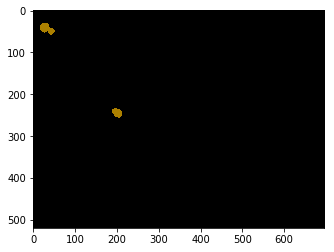

IXMtest_A09_s1_w1CE70AD49-290D-4312-82E6-CDC717F32637
# nuclei ground truth 149
# nuclei model 128
# matches 117
# overdetections 11
# underdetections 32
# mean IoU 0.703992


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_CP/error_img/IXMtest_A12_s7_w1EAEEA614-51ED-43B3-A4FF-088730911E4C.png is a low contrast image
  warn('%s is a low contrast image' % fname)


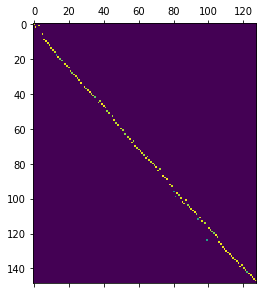

[  4   5   6   8   9  14  18  23  27  34  36  44  50  53  55  57  60  63
  65  70  86  87  91  92  95  96 111 116 117 124 128 149]


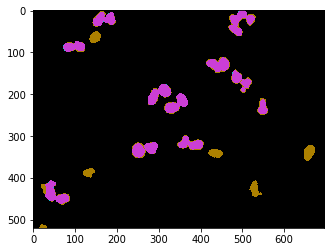

In [5]:
for filename in test_files:
    
    filename_wo_ext = os.path.splitext(filename)[0]
    print(filename_wo_ext)
    # load error matrices
    IoU = np.load(mat_dir + filename_wo_ext + '.npy')

    # load segmentations
    seg_gt = skimage.io.imread(gt_data_dir + filename)
    seg_mo = skimage.io.imread(mo_data_dir + filename)
    
    # visualize only if matrices are full (no empty images and some detection)
    if(IoU.size != 0):
        error_img = visualize(IoU, seg_gt, seg_mo)
        plt.imshow(error_img)
        plt.show()
        skimage.io.imsave(err_img_out_dir + filename, error_img)
        